# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [52]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head())
data.describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [53]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income == ">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income == "<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(n_greater_50k)/(n_records) * 100
print greater_percent

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

24.7843969749
Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [54]:
len(data[data.income == ">50K"]) #verifying with the Numbers output(on my mac)

11208

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

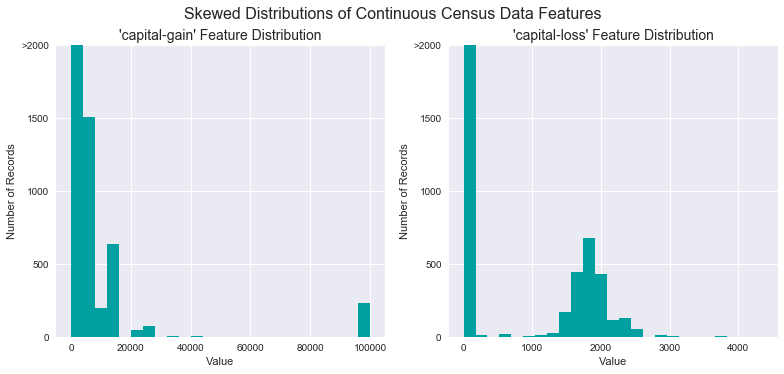

In [55]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

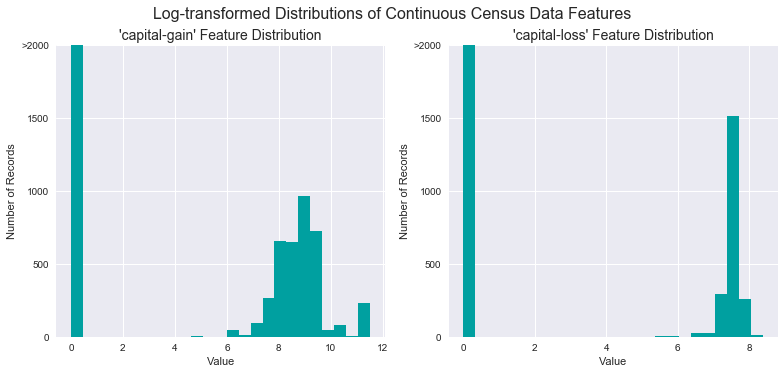

In [56]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))


# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [57]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 6))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.00000,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [58]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

#print features 

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


In [59]:
#income

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [60]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 1)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


In [61]:
#X_train

----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [62]:
# Calculate accuracy
prediction = np.array([1]*n_records)
print len(prediction)
tp = len(income[(income == 1) & (prediction == 1)])
print tp
tn = len(income[(income == 0) & (prediction == 0)])
print tn
fp = len(income[(income == 0) & (prediction == 1)])
print fp
fn = len(income[(income == 1) & (prediction == 0)])
print fn

accuracy = float(tp+tn)/n_records

# Calculate fscore using the formula above for beta = 0.5
beta = 0.5
recall = float(tp)/(tp+fn)
print recall
precision = float(tp)/(tp+fp)
fscore = (1+beta**2)*(precision*recall)/((precision*beta**2)+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

# re-evaluation
#from sklearn.metrics import accuracy_score, fbeta_score
#print ( "Accuracy_usinglib: ", accuracy_score(income, prediction))
#print ("fscore_usinglib", fbeta_score(income, prediction, beta) )

45222
11208
0
34014
0
1.0
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer**: 

Most important factors 
The one which works best, i.e.
- minimizes some cost function of interest (cross validation for example) will be the one that makes assumptions that are consistent with the data
- has sufficiently converged to its error rate.



# **Adaboost:**

#### Adaboost used for face detection.
Adaboost corrects its predecessor by paying a bit more attention to the training instances that the predecessor underfitted. 

**The advantages of AdaBoost are:**
- It can capture very complex decision boundaries. 
- Another advantage, it doesn't require to tweak lot of parameters. 

**The disadvantages of Adaboost are:**
- The algorithm tends to be sensitive to noisy data and outliers. It can also be slow to train.
- We can apply this model because it's a medium dataset (45 222 records). The model can be slow to train, however   it shouldn't matter because we probably want to run the model periodically and not in real-time.

###### We can apply this model because it's a medium dataset (45 222 records). The model can be slow to train, however it shouldn't matter because we probably want to run the model periodically and not in real-time.


# **Logistic Regression:**

#### Crime Data Mining : Predicting the crime rate of a states based on drug usage, number of gangs, human trafficking, and Killings.
Logistic Regression (also called logit regression) is commonly used to estimate the probability that an instance belongs to a particular class. It computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression

**The advantages of LR are:**
- Simple to interprit the output and gives a good performance
- It has low variance and so is less prone to over-fitting

**The disadvantages of LR are:**
- Can't learn complex relations. 
- can't outperform decison tress if pruning and overfitting is take care of. 

###### Applicable because it's the baseline algorithms in most framework; it's widely used in applications and quick computation time also good for using varied models in Voting_Classifier. 


# **Gradient Boosting:**

#### Ecology, customer centric marketing & face detection.
Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.  However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

**The advantages of GBRT are:**
- Natural handling of data of mixed type (= heterogeneous features)
- Predictive power
- Robustness to outliers in output space (via robust loss functions)

**The disadvantages of GBRT are:**
- Scalability, due to the sequential nature of boosting it can hardly be parallelized.
- A lot of parameters to tune before finding the optimized model. 

###### Ensamble technique takes care of the complex relationships in categorical variables very well, and is not prone to overfitting though slower than Adaptive boosting yet gives better accuracy. 

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [63]:
#y_train

In [64]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    #print learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta = 0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta = 0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
VotingClassifier trained on 361 samples.
VotingClassifier trained on 3617 samples.
VotingClassifier trained on 36177 samples.


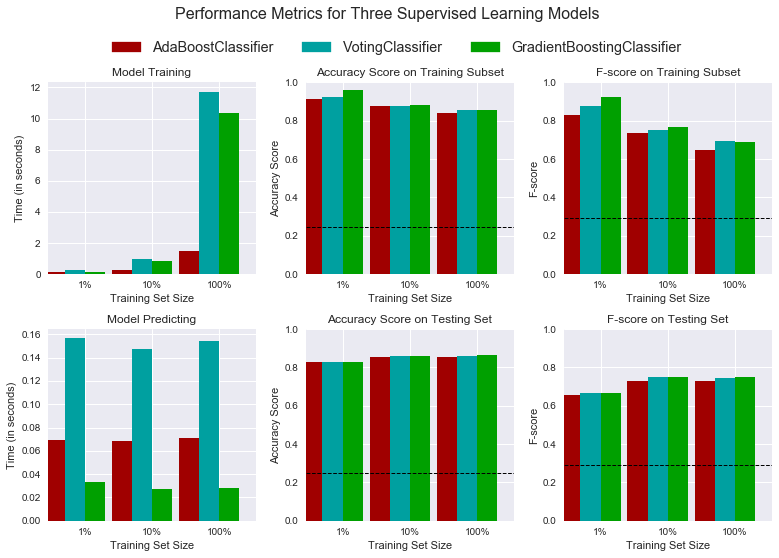

In [65]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score

#from pylightgbm.models import GBMClassifier
#exec1 = "/Users/avaneeshkumar/code/LightGBM/lightgbm"
#clf_x = GBMClassifier(exec_path=exec1)

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state = 11)
#clf_B = linear_model.LogisticRegression(random_state = 11)
clf_C = AdaBoostClassifier(algorithm="SAMME.R",random_state = 11)
#clf_C = linear_model.SGDClassifier(random_state = 11)
clf_M = VotingClassifier(estimators=[('GBM', clf_A), ('adaboost', clf_C)],voting='hard') #soft voting also an option 

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(y_train) * 0.01)
samples_10 = int(len(y_train) * 0.1)
samples_100 = len(y_train)

results = {}
for clf in [clf_A, clf_C, clf_M]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

"""for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)"""
        

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)




In [66]:
results


{'AdaBoostClassifier': {0: {u'acc_test': 0.82587064676616917,
   u'acc_train': 0.91333333333333333,
   u'f_test': 0.65643783612780759,
   u'f_train': 0.82792207792207795,
   u'pred_time': 0.0692451000213623,
   u'train_time': 0.11191105842590332},
  1: {u'acc_test': 0.8556108347153123,
   u'acc_train': 0.87666666666666671,
   u'f_test': 0.73106764288055959,
   u'f_train': 0.73717948717948711,
   u'pred_time': 0.06886887550354004,
   u'train_time': 0.2726728916168213},
  2: {u'acc_test': 0.85660585959093427,
   u'acc_train': 0.83999999999999997,
   u'f_test': 0.73134168540528965,
   u'f_train': 0.64759036144578308,
   u'pred_time': 0.07103204727172852,
   u'train_time': 1.476823091506958}},
 'GradientBoostingClassifier': {0: {u'acc_test': 0.82896627971254833,
   u'acc_train': 0.95999999999999996,
   u'f_test': 0.66528066528066521,
   u'f_train': 0.92592592592592593,
   u'pred_time': 0.0332789421081543,
   u'train_time': 0.11687111854553223},
  1: {u'acc_test': 0.86080707573244886,
   u'

## why fbeta is better for test than for train for algos.??


In [67]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,fbeta_score
from sklearn.svm import SVC

#clf_A = SVC(random_state = 11)
clf_A1 = GradientBoostingClassifier(random_state = 11)
clf_A = AdaBoostClassifier(algorithm="SAMME.R",random_state = 11)
clf_B = linear_model.LogisticRegression(random_state = 11)
clf_C = RandomForestClassifier(random_state = 11)
voting_clf = VotingClassifier(estimators=[('Adaboost', clf_A), ('LR', clf_B), ('RF', clf_C),("GBM",clf_A1)],voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (clf_A,clf_B,clf_C,clf_A1,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print (clf.__class__.__name__, fbeta_score(y_test, y_pred,beta= 0.5))\
    

    
#combination of various classifiers i.e. voting classifies still GBM performs better.     

#Output Without GBM in Voting classifier  
('SGDClassifier', 0.8385848535102266)
('SGDClassifier', 0.69400259219983507)
('LogisticRegression', 0.845771144278607)
('LogisticRegression', 0.70355980258321948)
('RandomForestClassifier', 0.83803206191265889)
('RandomForestClassifier', 0.68280383257690369)
('VotingClassifier', 0.84919845218352685)
('VotingClassifier', 0.71577789994502483)

#Output with GBM in Voting classifier
('SGDClassifier', 0.8385848535102266)
('SGDClassifier', 0.69400259219983507)
('LogisticRegression', 0.845771144278607)
('LogisticRegression', 0.70355980258321948)
('RandomForestClassifier', 0.83803206191265889)
('RandomForestClassifier', 0.68280383257690369)
('GradientBoostingClassifier', 0.86268656716417913)
('GradientBoostingClassifier', 0.74898563438973564)
('VotingClassifier', 0.85085682697623)


#hard voring
('VotingClassifier', 0.72665174891061124)
#soft voting
('VotingClassifier', 0.73197378004369984)"""

u'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.ensemble import VotingClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score,fbeta_score\nfrom sklearn.svm import SVC\n\n#clf_A = SVC(random_state = 11)\nclf_A1 = GradientBoostingClassifier(random_state = 11)\nclf_A = AdaBoostClassifier(algorithm="SAMME.R",random_state = 11)\nclf_B = linear_model.LogisticRegression(random_state = 11)\nclf_C = RandomForestClassifier(random_state = 11)\nvoting_clf = VotingClassifier(estimators=[(\'Adaboost\', clf_A), (\'LR\', clf_B), (\'RF\', clf_C),("GBM",clf_A1)],voting=\'soft\')\nvoting_clf.fit(X_train, y_train)\n\nfrom sklearn.metrics import accuracy_score\nfor clf in (clf_A,clf_B,clf_C,clf_A1,voting_clf):\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))\n    print (clf.__class__.__name__, fbeta_score(y_test, y_pred,beta= 0.5))    \n\n    \n#combinat

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **
Eeven after comparing using other features in VotingClassifier with and without the GBM classifier, GBM alone outperforms. 

('GradientBoostingClassifier', 0.86268656716417913) : **Accuracy**

('GradientBoostingClassifier', 0.74898563438973564)  : **fbeta_score**
- yet soft voting
('VotingClassifier', 0.73197378004369984)

**Prediction_time** = 'pred_time': 0.026629924774169922' which is less than AdaBosst, but 

(**higher training** = 'train_time': 10.93631100654602') a higher traing_time than AdaBosst due to the method of boosting which provides better accuracy i.e. this method tries to fit the new predictor to the residual errors made by the previous predictor.

Decision trees work best for this kind of data where you have less number of features and ample amount of data(better after doing the dimentionality PCA in term of time complexity).





### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

The idea behind GBM is to Boost the weak leraner or combine weak predictors. The trick is to find areas of misclassification and then “boost” the importance of those incorrectly predicted data points. And repeat. The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model. A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.
Much like the RandomForestRegressor class, it has hyperparameters to control the growth of Decision Trees (eg. max_depth, min_samples_leaf, and so on), as well as hyperparameters to control the ensemble training, such as the number of trees (n_estimators).

The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization techni‐ que called shrinkage. In order to find the optimal number of trees, you can use early stopping.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [68]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV as GCV
from sklearn.metrics import make_scorer, fbeta_score
#from __future__ import unicode_literals

# TODO: Initialize the classifier
clf1 = GradientBoostingClassifier(random_state=10)

#Optimised model after parameter tuning using gridsearch and using the model for time saving
clf = GradientBoostingClassifier(loss="deviance",learning_rate=0.05,n_estimators=300,
                                 min_samples_leaf=40, subsample=0.7,min_samples_split=600,
                                 max_features=12,random_state=10)
print "classfier : clf "


# TODO: Create the parameters list you wish to tune
"""parameters = [{'min_samples_split':range(200,1001,200),
             'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10),
             'max_features':range(7,20,2)}]"""


# TODO: Create the parameters list you wish to tune
parameters1 = {'max_depth': [6,7,8,9,10,11]}


# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5, )

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GCV(clf,parameters1, scoring = scorer, n_jobs=-1, cv=5)
print "grid_odj created"


# TODO: Fit thegrid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)
print "grid_obj fitted"

# Get the estimator
best_clf = grid_fit.best_estimator_
print best_clf

# Make predictions using the unoptimized and model
predictions = (clf1.fit(X_train, y_train)).predict(X_test)
best_predictions = (best_clf.fit(X_train, y_train)).predict(X_test)

print "predictions done - WELCOME SCORES"
# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))

#Fbeta_score is maximum for idec the value of beta i.e. beta < 1 lends more weight to precision
print "F-score on (beta 0.5)testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.01))

print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))

#Fbeta_score is maximum for idec the value of beta i.e. beta < 1 lends more weight to precision
print "Final F-score on (beta 0.5)the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.01))

classfier : clf 
grid_odj created
grid_obj fitted
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss=u'deviance', max_depth=8,
              max_features=12, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=40,
              min_samples_split=600, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=10,
              subsample=0.7, verbose=0, warm_start=False)
predictions done - WELCOME SCORES
Unoptimized model
------
Accuracy score on testing data: 0.8627
F-score on (beta 0.5)testing data: 0.7490
F-score on testing data: 0.7965

Optimized Model
------
Final accuracy score on the testing data: 0.8691
Final F-score on (beta 0.5)the testing data: 0.7546
Final F-score on the testing data: 0.7836


In [196]:
#from clint.textui import colored
#print colored.green("abysmal")

abysmal


In [69]:
#feature Importance
best_clf.feature_importances_


array([  1.15217419e-01,   6.54209531e-02,   1.48615228e-01,
         1.58451656e-01,   8.54225830e-02,   9.81908023e-03,
         1.06707655e-02,   7.68447957e-03,   7.65345850e-03,
         1.55866665e-02,   6.17006948e-03,   0.00000000e+00,
         1.05070935e-03,   1.27680848e-03,   5.79946637e-04,
         1.43451071e-04,   4.72667723e-04,   2.10232143e-03,
         8.04847461e-04,   6.00506467e-03,   3.12929226e-03,
         8.83304547e-03,   4.96535471e-03,   7.69038062e-03,
         7.67434638e-03,   1.85654265e-04,   7.18433306e-03,
         6.45949030e-03,   7.37257410e-03,   0.00000000e+00,
         2.78623717e-02,   7.09237855e-04,   1.32582508e-02,
         1.81439892e-03,   3.08114522e-03,   4.51966171e-03,
         0.00000000e+00,   6.18921353e-03,   1.83750813e-02,
         8.30571080e-03,   5.90440273e-03,   6.27286119e-03,
         7.15131252e-03,   7.41744574e-04,   1.77030318e-02,
         1.34284673e-02,   8.58700478e-03,   9.34142407e-03,
         6.22516262e-03,

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.2478        |         0.8627    |     0.8691      |
| F-score        |       0.2917        |         0.7490    |     0.7546      |


In [70]:
#F-score:  

**Answer: **
Optimized model's accuracy and F-score on the testing data is 0.8691 and 0.7546 respectively. These scores are slightly better than that of unoptimized model. The results from the optimized model is much much better when compared to naive predictor benchmarks. Thus we can infer that the model optimization is done in the correct direction.

# Doubt
Q. why not use beta = 0.01, accuracy = 78.36 on test_data.


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

**Below are the five features which are believed to be most important for prediction along ranking.**
##### - 1  Education_num or Education_level (correlated)
##### - 2  Capital_gain 
##### - 3  Marital_status
##### - 4  Age
##### - 5  workclass(In INDIA)

Education_num according to me is the most important as thelevel of education directly influences the salary and thus the capability and I have done some data exploration on a dataset somewhat related where edu_num was an imp. feature, capital_gain is an imp. feature in my consideration as only gains can compell you to think about giving or donating and charity.
Marital_status influences donors as priorities change and responsibilities increase as a person is married. 
Age is also a closely connected parameter as with age the purchasing power increases as the expirience increase.
Last is workclass or the type of work you do, some jobs are high paid jobs and other are more comfortable and less exhautives in INDIA so is my choice. 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [91]:
import matplotlib.pyplot as plt 
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

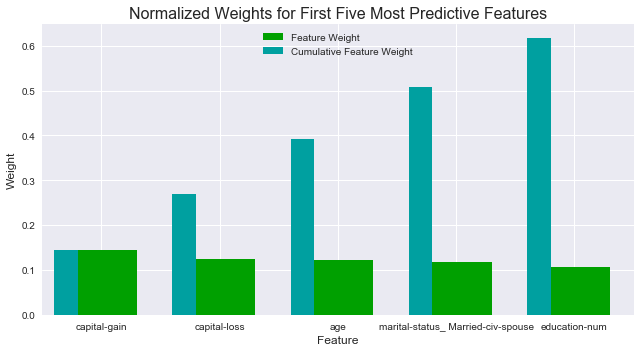

In [92]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(random_state = 11)
model.fit(X_train,y_train)


# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

It appears the visualization displays the five most relevant features for predicting if an individual makes at most or above $50,000 in which 4  seems to be same but not their rankings in Question 6. Except capital_loss feature all others seems to confirm the features mentioned in Question 6.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [95]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = GradientBoostingClassifier(loss="deviance",learning_rate=0.1,n_estimators=300,min_samples_leaf=40,
                                max_depth=8, subsample=0.7,min_samples_split=600,max_features=4,random_state=10)

start = time()
clf_fit = clf.fit(X_train_reduced, y_train)
# Make new predictions
reduced_predictions = clf_fit.predict(X_test_reduced)
end = time() # Get end time
y = end - start
print "train_time", y

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

train_time 7.85854005814
Final Model trained on full data
------
Accuracy on testing data: 0.8691
F-score on testing data: 0.7546

Final Model trained on reduced data
------
Accuracy on testing data: 0.8540
F-score on testing data: 0.7268


In [96]:
# Accuracy
print ((0.8691-0.8540)/0.8691)*100
#Fbeta_score : beta = 0.5
print ((0.7546 - 0.7268)/0.7546)*100
#Fbeta_score : beta = 0.01
print ((0.7836 - 0.7717)/0.7836)*100
#training Time
print ((10.93631100654602 - 8.29470682144)/10.93631100654602)*100


1.7374295248
3.68407103101
1.51863195508
24.1544354721


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

As expected, reducing the number of features has a negative impact upon our model. The optimized model has dropped in accuracy by around 1.7374%, and the F-Score has dropped by around 3.6840% (at beta = 0.5) and at 
###### beta = 0.01 
1.5186% decrease in fbeta_score. Can improve the fbeta_score by increasing the number of important_features as covering the variability information. 

#### Finally, 
####  approximately there is 24.15% reduction in training time as thus is an important parameter for selecting the model with reduced parameter. 



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.